<a href="https://colab.research.google.com/github/PritamKhan/Data_Analytics/blob/master/Assignment_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Theoretical Question's**
1.  **What is Boosting in Machine Learning?**
    Boosting is an ensemble machine learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner. It works by sequentially building models, where each new model focuses on correcting the errors of the previous ones.

2.  **How does Boosting differ from Bagging?**
    The key difference lies in how they combine models:
    * **Boosting:** Models are built sequentially, and each new model tries to correct the errors of the previous ones. It gives more weight to misclassified instances.
    * **Bagging (Bootstrap Aggregating):** Models are built independently and in parallel using different subsets of the training data (bootstrapped samples). The final prediction is typically an average or majority vote of the individual models.

3.  **What is the key idea behind AdaBoost?**
    The key idea behind AdaBoost (Adaptive Boosting) is to give more weight to misclassified data points in subsequent iterations. This forces the new weak learners to focus on the examples that were difficult for previous learners to classify correctly.

4.  **Explain the working of AdaBoost with an example.**
    Imagine you're trying to classify emails as spam or not spam.
    * **Step 1 (Initial Weights):** All emails initially have equal weights.
    * **Step 2 (First Weak Learner):** A simple model (e.g., a decision stump) is trained. It might misclassify some spam emails as not spam.
    * **Step 3 (Weight Update):** The misclassified spam emails are given higher weights, making them more "important."
    * **Step 4 (Second Weak Learner):** A new simple model is trained, focusing more on the now heavily weighted, previously misclassified spam emails.
    * **Step 5 (Repeat):** This process continues, with each new model trying to correct the errors of the combined previous models, until a desired accuracy is achieved or a maximum number of models is reached. The final prediction is a weighted sum of all weak learners' predictions.

5.  **What is Gradient Boosting, and how is it different from AdaBoost?**
    Gradient Boosting is a generalization of boosting that builds an ensemble of weak learners (typically decision trees) by iteratively minimizing a loss function.
    * **Difference from AdaBoost:** While AdaBoost primarily focuses on re-weighting misclassified samples, Gradient Boosting fits new models to the *residuals* (the differences between the actual and predicted values) of the previous models. It optimizes an arbitrary differentiable loss function using gradient descent.

6.  **What is the loss function in Gradient Boosting?**
    The loss function in Gradient Boosting measures the difference between the predicted and actual values. Common examples include:
    * **Mean Squared Error (MSE):** For regression problems.
    * **Log Loss (Binary Cross-Entropy):** For binary classification problems.
    * **Multiclass Log Loss (Categorical Cross-Entropy):** For multi-class classification problems.
    The goal of Gradient Boosting is to iteratively reduce this loss.

7.  **How does XGBoost improve over traditional Gradient Boosting?**
    XGBoost (eXtreme Gradient Boosting) improves upon traditional Gradient Boosting by:
    * **Regularization:** Includes L1 and L2 regularization to prevent overfitting.
    * **Parallel Processing:** Supports parallel tree building.
    * **Handling Missing Values:** Can automatically handle missing data.
    * **Tree Pruning:** Implements a 'max_depth' parameter and a 'min_child_weight' for pruning.
    * **Column Subsampling:** Similar to Random Forests, it can subsample features for each tree.
    * **Optimized Algorithms:** Uses more efficient algorithms for tree construction.

8.  **What is the difference between XGBoost and CatBoost?**
    * **XGBoost:** A highly optimized, general-purpose gradient boosting library known for speed and performance. It requires manual handling of categorical features (e.g., one-hot encoding).
    * **CatBoost:** Specifically designed to handle categorical features efficiently and automatically. It uses a novel algorithm called "Ordered Target Encoding" to reduce prediction shift caused by target leakage and has robust default parameters. It also excels in handling noisy data.

9.  **What are some real-world applications of Boosting techniques?**
    * **Spam Detection:** Classifying emails as spam or not spam.
    * **Fraud Detection:** Identifying fraudulent transactions.
    * **Credit Scoring:** Assessing creditworthiness of individuals.
    * **Customer Churn Prediction:** Predicting which customers are likely to leave.
    * **Medical Diagnosis:** Assisting in diagnosing diseases based on symptoms.
    * **Recommendation Systems:** Suggesting products or content to users.
    * **Image Recognition:** Object detection and classification.

10. **How does regularization help in XGBoost?**
    Regularization in XGBoost helps prevent overfitting by penalizing complex models.
    * **L1 Regularization (Lasso):** Adds a penalty proportional to the absolute value of the coefficients, encouraging sparsity (some coefficients become zero).
    * **L2 Regularization (Ridge):** Adds a penalty proportional to the square of the magnitude of the coefficients, shrinking them towards zero.
    These techniques reduce the model's reliance on any single feature or a small set of features, leading to better generalization on unseen data.

11. **What are some hyperparameters to tune in Gradient Boosting models?**
    * `n_estimators` (or `num_boost_round`): Number of boosting stages (trees).
    * `learning_rate` (or `eta`): Shrinks the contribution of each tree.
    * `max_depth`: Maximum depth of individual trees.
    * `subsample`: Fraction of samples used for fitting the trees.
    * `colsample_bytree`: Fraction of features used for fitting the trees.
    * `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
    * `gamma` (or `min_split_loss`): Minimum loss reduction required to make a further partition on a leaf node.
    * `lambda` (L2 regularization term on weights) and `alpha` (L1 regularization term on weights).

12. **What is the concept of Feature Importance in Boosting?**
    Feature importance in boosting refers to a score or value indicating how much each feature contributes to the model's overall prediction accuracy. It's typically calculated based on how often a feature is used in the trees and how much it reduces impurity (e.g., Gini impurity or MSE) when splitting nodes. Higher importance means the feature is more influential in making predictions.

13. **Why is CatBoost efficient for categorical data?**
    CatBoost is efficient for categorical data due to its unique approach:
    * **Ordered Target Encoding:** It uses a "permutation-driven" or "ordered" target encoding scheme to transform categorical features into numerical ones. This method prevents target leakage, which can occur when the target variable is used to encode categorical features, leading to biased estimates. It avoids "prediction shift."
    * **Handling of Combinations:** CatBoost can automatically combine categorical features to create new, more informative features, capturing complex interactions.
    * **No Need for One-Hot Encoding:** It eliminates the need for manual one-hot encoding, simplifying preprocessing and often leading to better performance and reduced memory usage, especially with high-cardinality categorical features.

### **Practical Question's**

In [ ]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 1.0


In [ ]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))

MAE: 0.7917933612559462


In [ ]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
print("Feature Importances:", model.feature_importances_)

Feature Importances: [8.89150214e-04 1.79085387e-02 4.93083605e-04 8.84982852e-05
 1.93410706e-04 2.82049964e-03 2.87739793e-05 4.74560845e-01
 4.10643086e-04 1.52187815e-04 7.09690716e-03 6.47707429e-03
 5.82945151e-04 8.86944608e-03 1.35904486e-03 1.93299695e-03
 1.28898526e-02 9.27634252e-03 1.49420695e-03 1.74321008e-03
 6.85475586e-02 5.15975109e-02 2.73858239e-02 4.41475366e-02
 4.09784590e-03 6.68395712e-04 1.65128368e-02 2.36669994e-01
 1.09221782e-03 1.26227352e-05]


In [ ]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test)))

R² Score: 0.86707107288374


In [ ]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate and compare accuracy
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
gb_acc = accuracy_score(y_test, gb_model.predict(X_test))

print("XGBoost Accuracy:", xgb_acc)
print("Gradient Boosting Accuracy:", gb_acc)


XGBoost Accuracy: 0.958041958041958
Gradient Boosting Accuracy: 0.958041958041958


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
# 19. Train a CatBoost Classifier and evaluate using F1-Score

from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cb_model = CatBoostClassifier(verbose=0, random_state=42)
cb_model.fit(X_train, y_train)
print("F1 Score:", f1_score(y_test, cb_model.predict(X_test), average='macro'))

F1 Score: 0.9776014201430585


In [ ]:
#20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, xgb_reg.predict(X_test)))

MSE: 0.04561951383948326


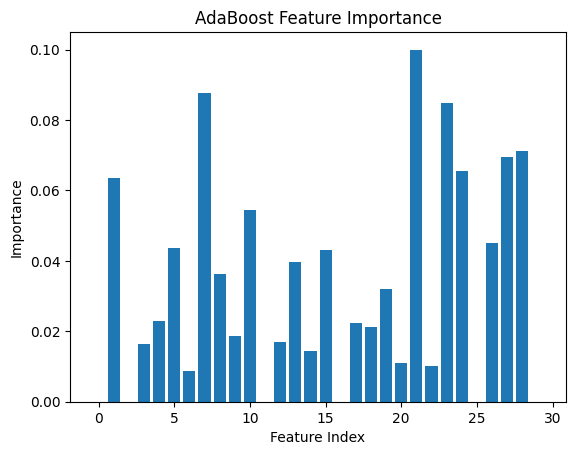

In [ ]:
# 21. Train an AdaBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
plt.bar(range(X.shape[1]), model.feature_importances_)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

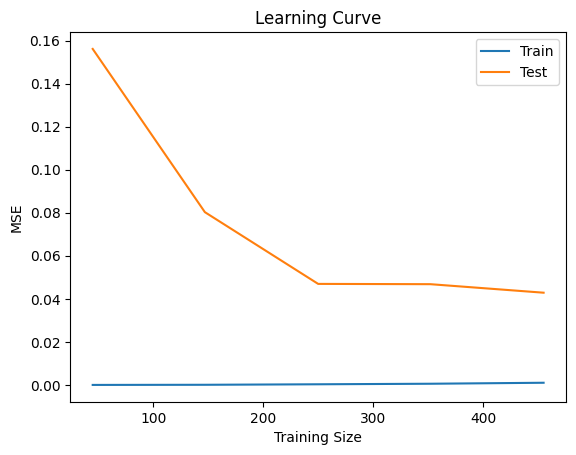

In [ ]:
# 22. Train a Gradient Boosting Regressor and plot learning curves

import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(random_state=42), X, y, cv=5,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5))

plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label='Test')
plt.xlabel("Training Size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend()
plt.show()

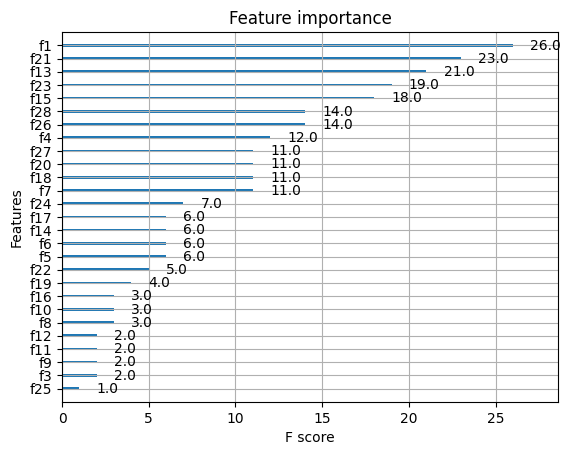

In [ ]:
#23. Train an XGBoost Classifier and visualize feature importance

from xgboost import plot_importance

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
plot_importance(xgb_model)
plt.show()

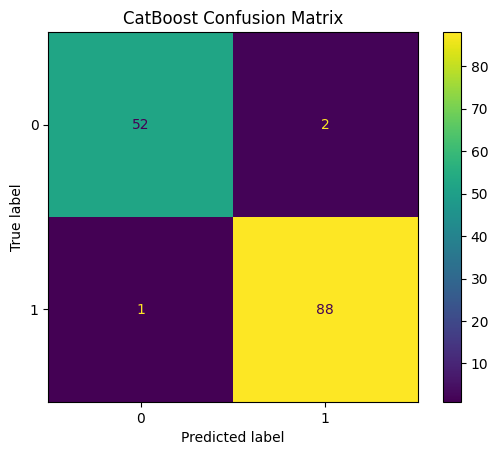

In [ ]:
# 24. Train a CatBoost Classifier and plot the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cb_model = CatBoostClassifier(verbose=0, random_state=42)
cb_model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(cb_model, X_test, y_test)
plt.title("CatBoost Confusion Matrix")
plt.show()

In [ ]:
# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"n_estimators={n} → Accuracy: {acc:.4f}")

n_estimators=10 → Accuracy: 0.9720
n_estimators=50 → Accuracy: 0.9580
n_estimators=100 → Accuracy: 0.9790
n_estimators=200 → Accuracy: 0.9790


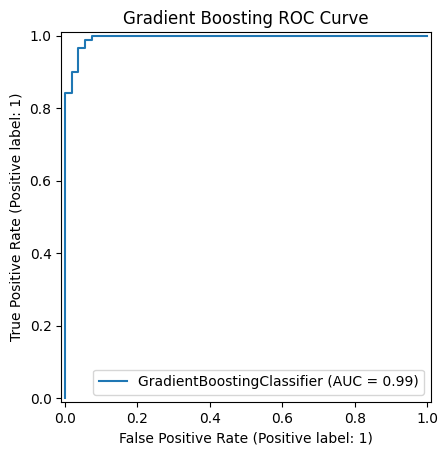

In [ ]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve

from sklearn.metrics import RocCurveDisplay

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Gradient Boosting ROC Curve")
plt.show()

In [ ]:
# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("Best learning rate:", grid.best_params_['learning_rate'])
print("Best MSE:", -grid.best_score_)

Best learning rate: 0.2
Best MSE: 0.051304460813601814


In [ ]:
# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

from sklearn.datasets import make_classification

X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, random_state=42)

cb = CatBoostClassifier(class_weights=[1, 10], verbose=0)
cb.fit(X_train, y_train)
print("F1 Score (Imbalanced):", f1_score(y_test, cb.predict(X_test)))

F1 Score (Imbalanced): 0.7083333333333334


In [ ]:
# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates

for lr in [0.01, 0.1, 0.5, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"learning_rate={lr} → Accuracy: {acc:.4f}")

learning_rate=0.01 → Accuracy: 0.9040
learning_rate=0.1 → Accuracy: 0.9360
learning_rate=0.5 → Accuracy: 0.9360
learning_rate=1.0 → Accuracy: 0.9480


In [ ]:
# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model = XGBClassifier(objective='multi:softprob', num_class=10, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
probs = xgb_model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))

Log Loss: 0.08212887449369577
